Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.7116 - loss: 0.7825 - val_accuracy: 0.8566 - val_loss: 0.3956
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.8700 - loss: 0.3590 - val_accuracy: 0.8733 - val_loss: 0.3465
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.8896 - loss: 0.3033 - val_accuracy: 0.8841 - val_loss: 0.3158
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9015 - loss: 0.2667 - val_accuracy: 0.8967 - val_loss: 0.2813
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9131 - loss: 0.2363 - val_accuracy: 0.8990 - val_loss: 0.2838
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9229 - loss: 0.2114 - val_accuracy: 0.9096 - val_loss: 0.2562
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9252 - loss: 0.1983 - val_accuracy: 0.9026 - val_loss: 0.2696
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9305 - loss: 0.1852 - 

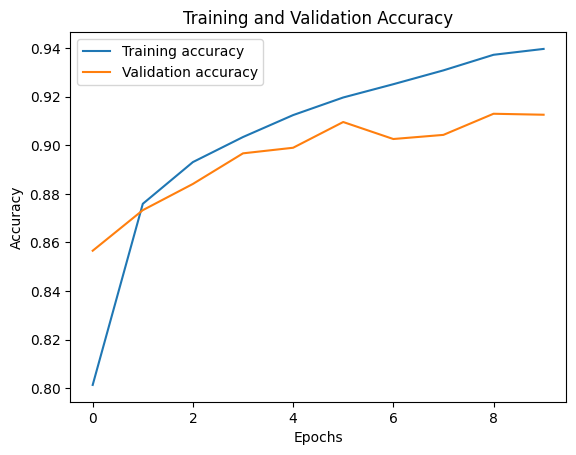

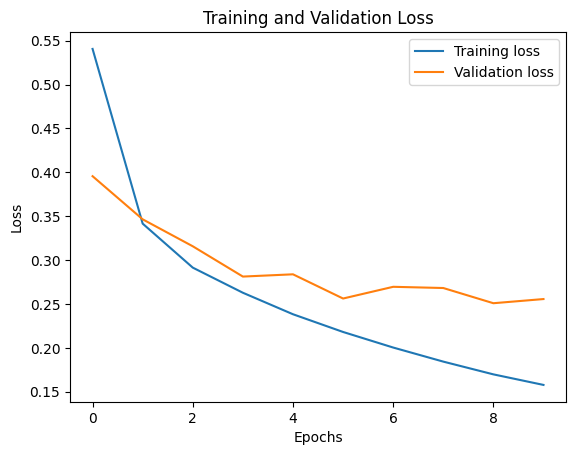

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical


(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()


train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Точність попередньої багатошарової мережі склала 0.8852 на відміну від згорткової точність якої була вищою і склала 0.9125.

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import InputLayer

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

train_images = tf.image.grayscale_to_rgb(tf.expand_dims(train_images, -1))
test_images = tf.image.grayscale_to_rgb(tf.expand_dims(test_images, -1))

train_images = tf.cast(train_images, tf.float32) / 255.0
test_images = tf.cast(test_images, tf.float32) / 255.0

train_images = tf.image.resize(train_images, (32, 32))
test_images = tf.image.resize(test_images, (32, 32))

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [4]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(train_images, train_labels, batch_size=64)
validation_generator = test_datagen.flow(test_images, test_labels, batch_size=64)

In [8]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Заморожуємо всі шари базової моделі, окрім останніх чотирьох
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Створення нової моделі
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')  # Заміна на softmax для багатокласової класифікації
])

# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Для багатокласової класифікації
              metrics=['accuracy'])

In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_images) // 64,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(test_images) // 64
)


test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/10


C:\Users\kybav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 907s 965ms/step - accuracy: 0.6475 - loss: 0.9584 - val_accuracy: 0.8029 - val_loss: 0.5286
Epoch 2/10
  1/937 ━━━━━━━━━━━━━━━━━━━━ 12:58 832ms/step - accuracy: 0.7656 - loss: 0.5986

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - accuracy: 0.7656 - loss: 0.5986 - val_accuracy: 0.8750 - val_loss: 0.2784
Epoch 3/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 786s 839ms/step - accuracy: 0.7930 - loss: 0.5738 - val_accuracy: 0.8145 - val_loss: 0.4872
Epoch 4/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 207us/step - accuracy: 0.7812 - loss: 0.5688 - val_accuracy: 0.8750 - val_loss: 0.2385
Epoch 5/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 768s 819ms/step - accuracy: 0.8100 - loss: 0.5226 - val_accuracy: 0.8488 - val_loss: 0.4075
Epoch 6/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 185us/step - accuracy: 0.7344 - loss: 0.5332 - val_accuracy: 0.9375 - val_loss: 0.2222
Epoch 7/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 629s 671ms/step - accuracy: 0.8172 - loss: 0.5079 - val_accuracy: 0.8530 - val_loss: 0.4016
Epoch 8/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 139us/step - accuracy: 0.7656 - loss: 0.8169 - val_accuracy: 0.9375 - val_loss: 0.1576
Epoch 9/10
937/937 ━━━━━━━━━━━━━━━━━━━━ 2037s 2s/step - accuracy: 0.8220 - loss: 0.4922 - val_a

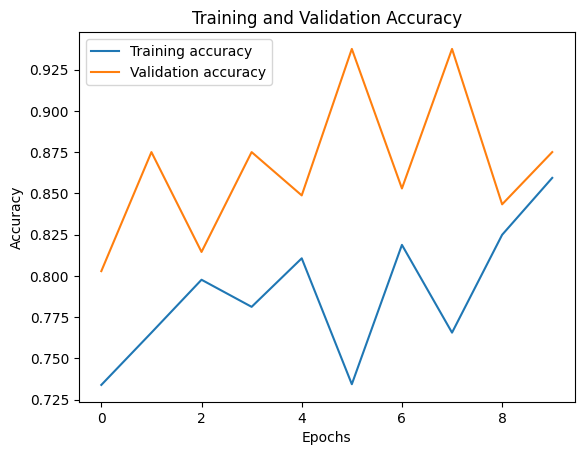

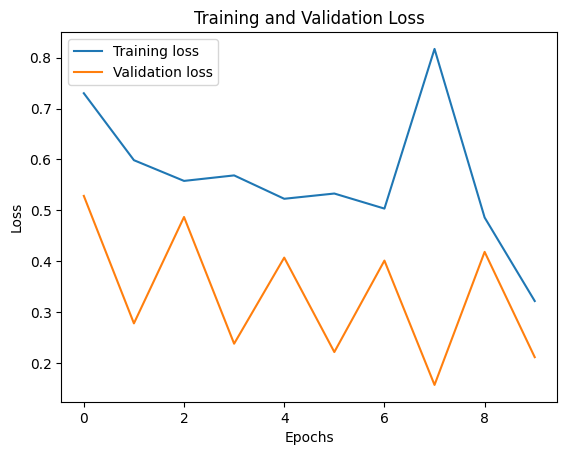

In [11]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
